In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt 
from pandas_datareader import data as pdr

In [2]:
df = pd.read_csv("VOO2.csv", parse_dates=True, index_col='Date')

In [3]:
df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-09-24,609.50,23787300,612.630,612.74,608.1900
2025-09-23,611.54,10753000,614.705,615.26,610.3410
2025-09-22,614.76,11583810,610.520,615.22,610.5100
2025-09-19,611.78,6065655,610.620,612.67,608.8500
2025-09-18,608.94,11057540,608.550,611.31,607.0700
...,...,...,...,...,...
2015-10-01,176.20,3948423,175.970,176.43,174.0000
2015-09-30,175.71,4123433,174.560,175.84,173.6700
2015-09-29,172.40,3219419,172.670,173.92,171.3601


In [ ]:
df.columns = df.columns.str.strip()  
df.columns = df.columns.str.capitalize()

In [4]:
num_simulations =1000
forcast_days =365


simulations = np.zeros((num_simulations, forcast_days))

last_price = df['Close/Last'].iloc[-1] 

daily_returns = df['Close/Last'].pct_change().dropna()

In [5]:
for i in range(num_simulations):
    cum_returns = np.random.choice(daily_returns, size=forcast_days, replace=True).cumsum()
    simulations[i, :] = last_price * (1+ cum_returns)


print(simulations)

[[177.03325972 176.27904715 173.60653011 ... 138.63361342 138.67259027
  136.17729818]
 [178.71183273 178.81322172 179.33020779 ... 115.44446297 115.26825174
  118.41449331]
 [177.23684192 176.86445059 177.43556529 ... 111.08484194 110.79368291
  110.26772509]
 ...
 [176.55244499 175.04055209 174.75224153 ... 117.9253575  118.5997221
  118.5997221 ]
 [178.19309472 177.19455811 176.16659072 ... 159.48251459 161.9452985
  159.59975709]
 [175.04868828 171.42246645 171.10877792 ... 163.08405418 162.01507954
  160.89067564]]


In [6]:
print(simulations[2, 0:4])

[177.23684192 176.86445059 177.43556529 177.84987409]


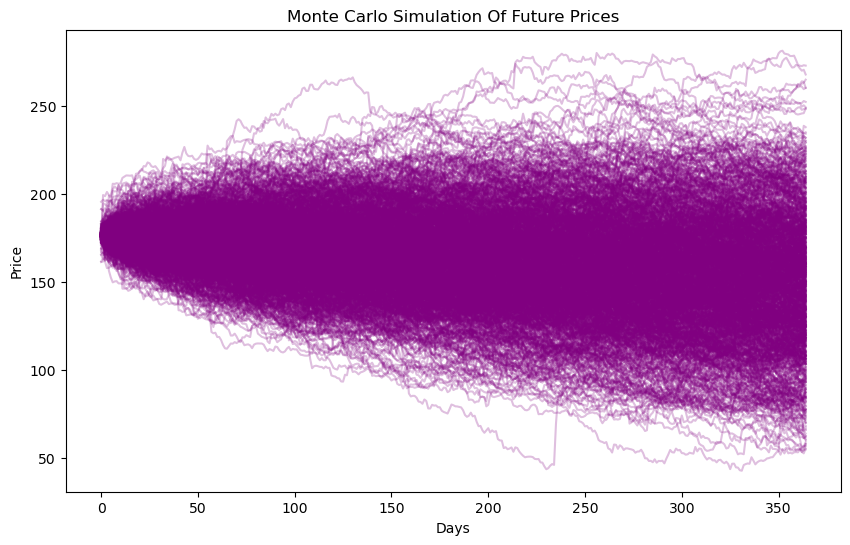

In [7]:
plt.figure(figsize=(10,6))
plt.plot(simulations.T, color='purple', alpha=0.25)
plt.title('Monte Carlo Simulation Of Future Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

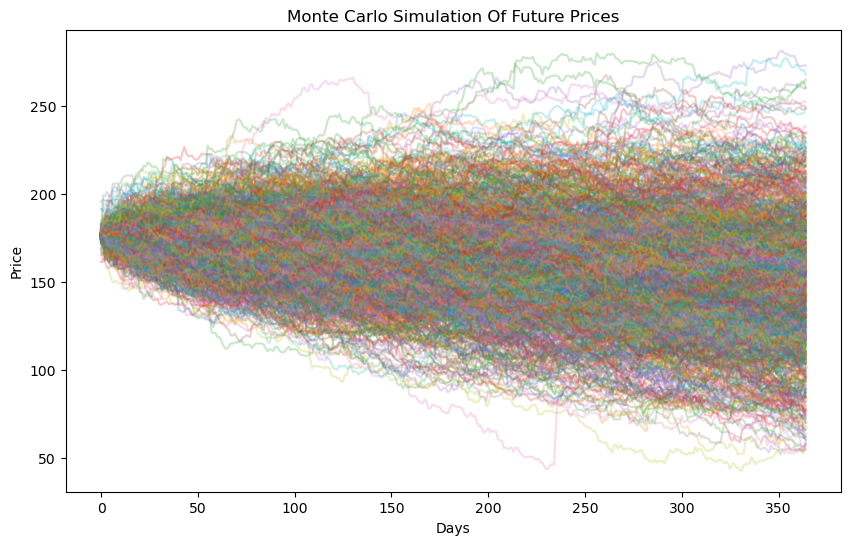

In [8]:
plt.figure(figsize=(10,6))
for i in range(num_simulations):
    plt.plot(simulations[i],  alpha=0.25)
plt.title('Monte Carlo Simulation Of Future Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()